## Ridge regression

In [1]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### Declare some visual functions

In [2]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()

#### Select feature

##### Read data

- Training set

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Floors,Rooms,...,Street Name_đường khue đông,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4,Street Name_đồng xoài,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,2.236068,1.032339,4,6,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,10.400602,4.003590,10.000000,2.236068,0.379909,4,5,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,10.398891,4.009621,10.000000,2.236068,0.379909,4,5,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,10.399521,4.008289,8.660254,2.236068,-0.707473,4,6,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.236068,2.554674,1,1,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


##### Input variables

- Training set

In [4]:
x = df.drop(columns=["Price", "Legal Status", "Width (m)"])
x.head()

,Longitude,Latitude,Area (m²),Length (m),Land Type,House Direction,Floors,Rooms,Toilets,Furnishing Sell,...,Street Name_đường khue đông,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4,Street Name_đồng xoài,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,1.032339,4,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,10.400602,4.003590,10.000000,0.379909,4,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,10.398891,4.009621,10.000000,0.379909,4,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,10.399521,4.008289,8.660254,-0.707473,4,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.554674,1,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


##### Target variables

- Training set

In [5]:
y = df[['Price']]
y.head()

,Price
0,-2.025937
1,-1.983353
2,-1.983353
3,-1.968324
4,-1.900692


##### Divide into 2 training sets and validation sets

 - Split data

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=554)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(3897, 1859) (975, 1859)
(3897, 1) (975, 1)


#### Select Alpha coefficient

In [7]:
alpha_range = np.arange(0.05, 1, 0.05)
models = {}

def _regression(alpha, X_train, y_train, X_validation, y_validation, models: dict):
    dict_models = {}
    rid_regr = Ridge(alpha=alpha)
    rid_regr.fit(X_train, y_train)
    y_pred = rid_regr.predict(X_validation)
    MSE = np.mean((y_validation-y_pred)**2)
    dict_models["MSE"] = MSE
    dict_models["model"] = rid_regr
    model_name = "ridge_" + str(alpha)
    models[model_name] = dict_models
    return models

for alpha in alpha_range:
  models = _regression(round(alpha, 2), X_train, y_train, X_validation, y_validation, models)

# Print out the model with the best alpha coefficient (smallest MSE)
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k
  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))


model ridge_0.05, MSE: 0.31462163754271655
model ridge_0.1, MSE: 0.30782201438501827
model ridge_0.15, MSE: 0.3046921099727711
model ridge_0.2, MSE: 0.30301436503697193
model ridge_0.25, MSE: 0.30212974864880277
model ridge_0.3, MSE: 0.30174557175099603
model ridge_0.35, MSE: 0.30170361202484286
model ridge_0.4, MSE: 0.30190774637658274
model ridge_0.45, MSE: 0.302294886012552
model ridge_0.5, MSE: 0.3028212979503546
model ridge_0.55, MSE: 0.30345541918995683
model ridge_0.6, MSE: 0.30417376079541875
model ridge_0.65, MSE: 0.30495842059195866
model ridge_0.7, MSE: 0.30579549420601415
model ridge_0.75, MSE: 0.3066740170916411
model ridge_0.8, MSE: 0.3075852355129026
model ridge_0.85, MSE: 0.30852208954773114
model ridge_0.9, MSE: 0.309478837431681
model ridge_0.95, MSE: 0.31045077689272427
-----------------------------------------
Best models: ridge_0.95, MSE: 0.31045077689272427


*Vậy với Alpha 0.95 sẽ cho mô hình tối ưu nhất*

#### Model training

##### 4.1 Create a Ridge Regression model object from the linear_model library and train it with input and target variables

In [8]:
ridge_regression = Ridge(alpha=0.95)
ridge_regression.fit(X_train, y_train)


Ridge(alpha=0.95)

##### Real estate price prediction

- Prediction on validation set

In [9]:
y_pred_validation = ridge_regression.predict(X_validation)
y_pred_validation

array([[-9.61146325e-01],
       [-7.98438371e-02],
       [-3.96013758e-01],
       [ 1.35544272e-02],
       [ 4.64818871e-01],
       [-1.15597860e+00],
       [-8.98520603e-01],
       [ 5.77122504e-01],
       [-1.13948940e-01],
       [ 3.14665075e-01],
       [-8.24757343e-01],
       [-7.05069094e-01],
       [ 1.66359132e+00],
       [-4.94312558e-01],
       [ 9.86646576e-01],
       [-7.39342519e-01],
       [-1.13769452e+00],
       [-2.91469261e-01],
       [ 6.69352148e-02],
       [-3.17480668e-01],
       [-1.15376751e-01],
       [ 1.61335511e-02],
       [ 1.08181550e+00],
       [ 8.90630378e-01],
       [-2.30946607e-01],
       [-3.90015490e-01],
       [-1.20369361e+00],
       [-3.65926106e-01],
       [-6.50840104e-01],
       [-1.02707191e+00],
       [-1.04423185e+00],
       [ 5.67577606e-02],
       [-1.35905616e+00],
       [ 2.12534868e-02],
       [-3.09322215e-01],
       [ 1.94057131e+00],
       [-4.53330083e-01],
       [ 1.96671561e-01],
       [-3.1

- On the train set

In [10]:
y_pred_train = ridge_regression.predict(X_train)
y_pred_train

array([[ 0.37700037],
       [ 1.84195229],
       [-0.40651218],
       ...,
       [ 0.38767745],
       [-0.87918048],
       [ 1.13515692]])

##### Model evaluation based on MSE and R-squared

- Review on Train

In [11]:
# Calculate MSE
mse_ridge_train = mean_squared_error(y_train, y_pred_train)

# Calculate R-squared
r2_ridge_train = r2_score(y_train, y_pred_train)

# Calculate MAPE
n = len(y_train)
mape = (1/n) * np.sum((np.abs((y_pred_train - y_train) / y)) * 100, axis=0)

print("Train Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge_train)
print("R-squared of Ridge Model:", r2_ridge_train * 100)
print("MAPE of Ridge Model:", mape)

Train Set:
Mean Squared Error (MSE) of Ridge Model: 0.16685993656755138
R-squared of Ridge Model: 83.14667506525838
MAPE of Ridge Model: Price    125.994612
dtype: float64


- Evaluation on the Validation set

In [12]:
# Calculate MSE
mse_ridge = mean_squared_error(y_validation, y_pred_validation)

# Calculate R-squared
r2_ridge = r2_score(y_validation, y_pred_validation)

# Calculate MAPE
n = len(y_validation)
mape = (1/n) * np.sum((np.abs((y_pred_validation - y_validation) / y)) * 100, axis=0)

print("Validation Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge)
print("R-squared of Ridge Model:", r2_ridge * 100)
print("MAPE of Ridge Model:", mape)

Validation Set:
Mean Squared Error (MSE) of Ridge Model: 0.31045077689272427
R-squared of Ridge Model: 70.1247331628363
MAPE of Ridge Model: Price    129.41557
dtype: float64


#### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

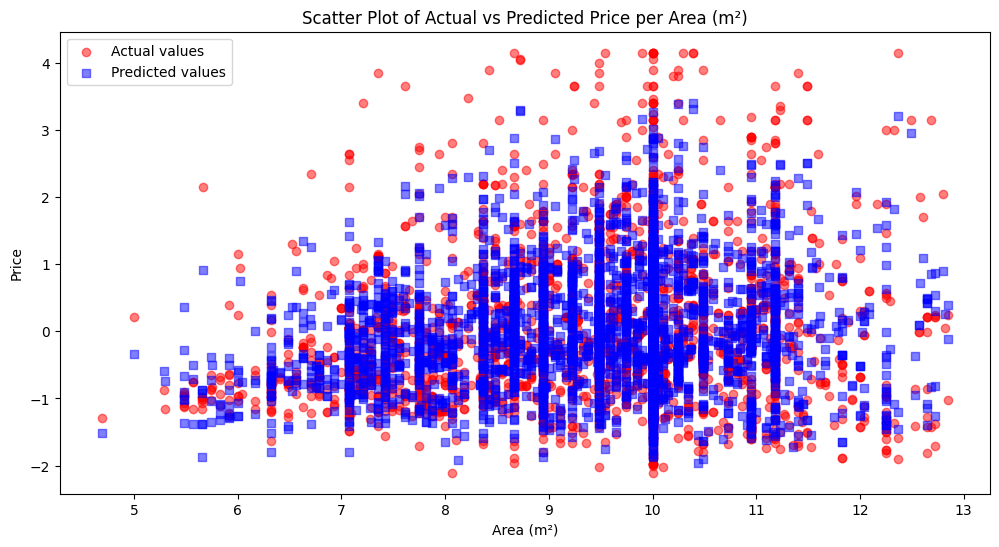

In [13]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

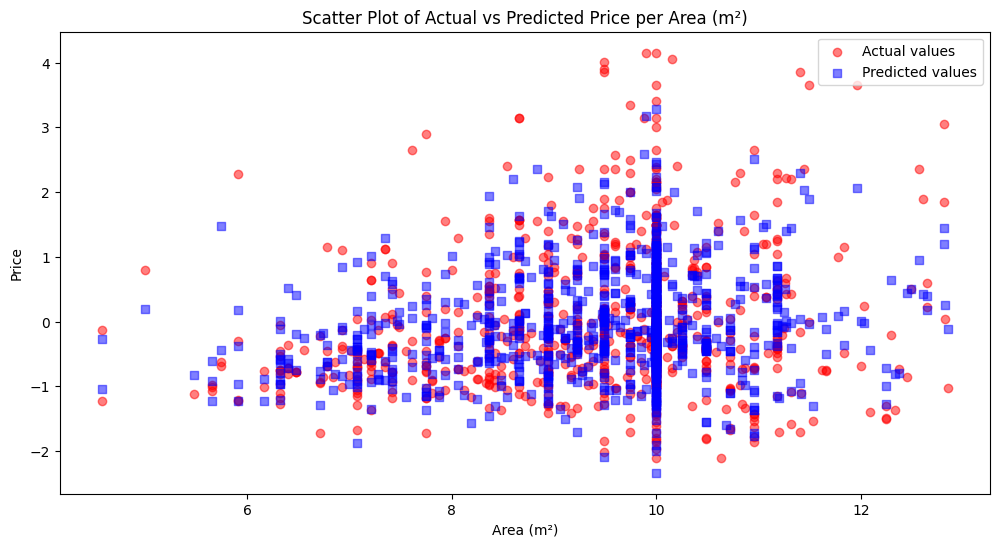

In [14]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

##### Advantages
<li>Provides a more stable solution than conventional Linear Regression by minimizing the magnitude of the coefficients, which improves accuracy and reduces the risk of overfitting</li>
<li>Maintains flexibility so that the model can adapt to new data</li>

##### Disadvantages
<li>More complex than Linear Regression</li>
<li>Not stable because changing random_state values ​​can cause model performance fluctuations</li>